In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
# Exploratory data analysis (from https://www.youtube.com/watch?v=COUWKVf6zKY)
import matplotlib as plt
import seaborn as sns
sns.set(context='notebook', style='darkgrid')
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame(data = [survived, dead], index = ["Survived", "Dead"])
    df.plot(kind='bar', stacked=True)

In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


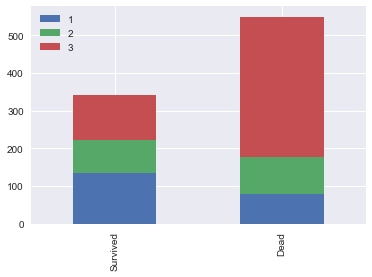

In [6]:
bar_chart('Pclass')
# A person from 3rd class had more chances to die, 
# and a person from 1st class had more chances to survive

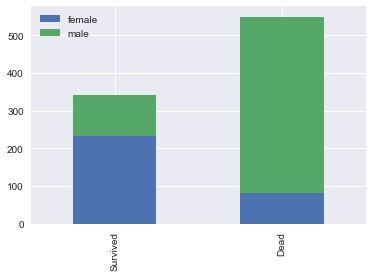

In [7]:
bar_chart('Sex')
# males had more chances to die than femals

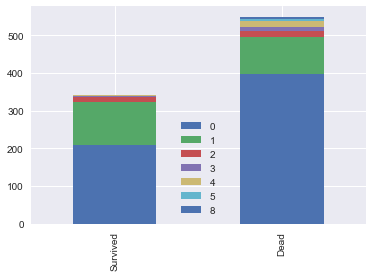

In [8]:
bar_chart('SibSp')
# Those with no spouses and siblings on board had less chances to survive

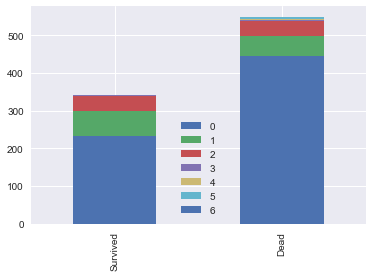

In [9]:
bar_chart('Parch')
# Those with no parents and children had less chances to survive

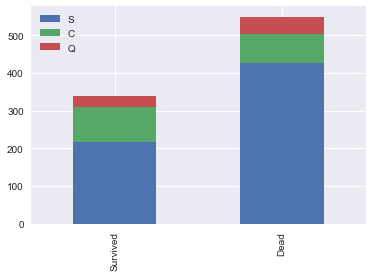

In [10]:
bar_chart("Embarked")
# 1: S = Southampton
# 2: C = Cherbourg 
# 3: Q = Queenstown,
# People who embarked in Southampton and Queenstown had bigger chance to die
# while those embarked in Cherbourg had a slightly higher chance to survive

In [11]:
# First we will take care of the Name column -> Title column

import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    print(big_string)
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

train['Title'] = train['Name'].map(lambda x: substrings_in_string(x, title_list))
test['Title'] = test['Name'].map(lambda x: substrings_in_string(x, title_list))
 
# Replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

train['Title'] = train.apply(replace_titles, axis=1)
test['Title'] = test.apply(replace_titles, axis=1)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [13]:
train = train.drop(labels = 'Name', axis = 1)
test = test.drop(labels = 'Name', axis = 1)

In [14]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [15]:
train = train[['PassengerId', 'Pclass', 'Title', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]

In [16]:
test = test[['PassengerId', 'Pclass', 'Title', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [17]:
train.head()

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
test.head()

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
# Let's map titles
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [20]:
# Second, we will take care of the AGE column

# We need to take care of missing values of Age column in the train dataset
from sklearn.preprocessing import Imputer
X_age1 = train.iloc[:, 0:5].values
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X_age1[:, 4:5])
X_age1 = imputer.transform(X_age1[:, 4:5])

# Filling-in train dataset with Age mean values
train['Age'] = X_age1

# We need to take care of missing values of Age column in the test dataset
from sklearn.preprocessing import Imputer
X_age2 = test.iloc[:, 0:5].values
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X_age2[:, 4:5])
X_age2 = imputer.transform(X_age2[:, 4:5])

# Filling-in train dataset with Cabin mean values
test['Age'] = X_age2

In [21]:
# Second, we will take care of the Cabin column


train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

cabin_mapping = {'A': 0, 'B':0.4, 'C':0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)
train.head(n=20)

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,0,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,2,female,38.000000,1,0,PC 17599,71.2833,0.8,C,1
2,3,3,1,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,2,female,35.000000,1,0,113803,53.1000,0.8,S,1
4,5,3,0,male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,3,0,male,29.699118,0,0,330877,8.4583,NaN,Q,0
6,7,1,0,male,54.000000,0,0,17463,51.8625,1.6,S,0
7,8,3,3,male,2.000000,3,1,349909,21.0750,NaN,S,0
8,9,3,2,female,27.000000,0,2,347742,11.1333,NaN,S,1
9,10,2,2,female,14.000000,1,0,237736,30.0708,NaN,C,1


In [22]:
# We need to take care of missing values of Cabin column in the train dataset
from sklearn.preprocessing import Imputer
X_c1 = train.iloc[:, 0:10].values
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X_c1[:, 9:10])
X_c1 = imputer.transform(X_c1[:, 9:10])

# Filling-in train dataset with Age mean values
train['Cabin'] = X_c1

# We need to take care of missing values of Cabin column in the test dataset
from sklearn.preprocessing import Imputer
X_c2 = test.iloc[:, 0:10].values
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X_c2[:, 9:10])
X_c2 = imputer.transform(X_c2[:, 9:10])

# Filling-in train dataset with Cabin mean values
test['Cabin'] = X_c2

In [23]:
test.head(n=20)

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,male,34.50000,0,0,330911,7.8292,0.918681,Q
1,893,3,2,female,47.00000,1,0,363272,7.0000,0.918681,S
2,894,2,0,male,62.00000,0,0,240276,9.6875,0.918681,Q
3,895,3,0,male,27.00000,0,0,315154,8.6625,0.918681,S
4,896,3,2,female,22.00000,1,1,3101298,12.2875,0.918681,S
5,897,3,0,male,14.00000,0,0,7538,9.2250,0.918681,S
6,898,3,1,female,30.00000,0,0,330972,7.6292,0.918681,Q
7,899,2,0,male,26.00000,1,1,248738,29.0000,0.918681,S
8,900,3,2,female,18.00000,0,0,2657,7.2292,0.918681,C
9,901,3,0,male,21.00000,2,0,A/4 48871,24.1500,0.918681,S


train.Embarked.unique()
train.info()

In [24]:
# Now, we take care of the Embarked column and fill one missing cell in the train dataset
# with the most frequently occuring value, which S

embarkation_list = {'Q': 0, 'S': 1, 'C': 2}
train['Embarked'] = train['Embarked'].map(embarkation_list)
test['Embarked'] = test['Embarked'].map(embarkation_list)
train['Embarked'] = train['Embarked'].fillna(1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Title          891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null float64
Survived       891 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 83.6+ KB


In [25]:
train.head(n=20)

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,0,male,22.000000,1,0,A/5 21171,7.2500,0.956863,1.0,0
1,2,1,2,female,38.000000,1,0,PC 17599,71.2833,0.800000,2.0,1
2,3,3,1,female,26.000000,0,0,STON/O2. 3101282,7.9250,0.956863,1.0,1
3,4,1,2,female,35.000000,1,0,113803,53.1000,0.800000,1.0,1
4,5,3,0,male,35.000000,0,0,373450,8.0500,0.956863,1.0,0
5,6,3,0,male,29.699118,0,0,330877,8.4583,0.956863,0.0,0
6,7,1,0,male,54.000000,0,0,17463,51.8625,1.600000,1.0,0
7,8,3,3,male,2.000000,3,1,349909,21.0750,0.956863,1.0,0
8,9,3,2,female,27.000000,0,2,347742,11.1333,0.956863,1.0,1
9,10,2,2,female,14.000000,1,0,237736,30.0708,0.956863,2.0,1


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Title          418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 36.0+ KB


In [27]:
# Taking care of missing Fare column values for the test dataset
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [28]:
# We also need to encode Sex column
from sklearn.preprocessing import LabelEncoder
labelencoder_S = LabelEncoder()
S = train.iloc[:, 0:4].values
S[:, 3] = labelencoder_S.fit_transform(S[:, 3])

In [29]:
train['Sex'] = S[:, 3]

In [30]:
train.head(n=20)

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,0,1,22.000000,1,0,A/5 21171,7.2500,0.956863,1.0,0
1,2,1,2,0,38.000000,1,0,PC 17599,71.2833,0.800000,2.0,1
2,3,3,1,0,26.000000,0,0,STON/O2. 3101282,7.9250,0.956863,1.0,1
3,4,1,2,0,35.000000,1,0,113803,53.1000,0.800000,1.0,1
4,5,3,0,1,35.000000,0,0,373450,8.0500,0.956863,1.0,0
5,6,3,0,1,29.699118,0,0,330877,8.4583,0.956863,0.0,0
6,7,1,0,1,54.000000,0,0,17463,51.8625,1.600000,1.0,0
7,8,3,3,1,2.000000,3,1,349909,21.0750,0.956863,1.0,0
8,9,3,2,0,27.000000,0,2,347742,11.1333,0.956863,1.0,1
9,10,2,2,0,14.000000,1,0,237736,30.0708,0.956863,2.0,1


In [31]:
labelencoder_S1 = LabelEncoder()
S1 = test.iloc[:, 0:4].values
S1[:, 3] = labelencoder_S1.fit_transform(S1[:, 3])
test['Sex'] = S1[:, 3]
test.head(n=20)

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,1,34.50000,0,0,330911,7.8292,0.918681,0
1,893,3,2,0,47.00000,1,0,363272,7.0000,0.918681,1
2,894,2,0,1,62.00000,0,0,240276,9.6875,0.918681,0
3,895,3,0,1,27.00000,0,0,315154,8.6625,0.918681,1
4,896,3,2,0,22.00000,1,1,3101298,12.2875,0.918681,1
5,897,3,0,1,14.00000,0,0,7538,9.2250,0.918681,1
6,898,3,1,0,30.00000,0,0,330972,7.6292,0.918681,0
7,899,2,0,1,26.00000,1,1,248738,29.0000,0.918681,1
8,900,3,2,0,18.00000,0,0,2657,7.2292,0.918681,2
9,901,3,0,1,21.00000,2,0,A/4 48871,24.1500,0.918681,1


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Title          418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 36.0+ KB


In [33]:
# Preparing the sets for modelling
X_train = train.drop('Ticket', axis = 1)
X_test = test.drop('Ticket', axis = 1)

In [34]:
X_train.head(n=20)

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,1,3,0,1,22.000000,1,0,7.2500,0.956863,1.0,0
1,2,1,2,0,38.000000,1,0,71.2833,0.800000,2.0,1
2,3,3,1,0,26.000000,0,0,7.9250,0.956863,1.0,1
3,4,1,2,0,35.000000,1,0,53.1000,0.800000,1.0,1
4,5,3,0,1,35.000000,0,0,8.0500,0.956863,1.0,0
5,6,3,0,1,29.699118,0,0,8.4583,0.956863,0.0,0
6,7,1,0,1,54.000000,0,0,51.8625,1.600000,1.0,0
7,8,3,3,1,2.000000,3,1,21.0750,0.956863,1.0,0
8,9,3,2,0,27.000000,0,2,11.1333,0.956863,1.0,1
9,10,2,2,0,14.000000,1,0,30.0708,0.956863,2.0,1


In [35]:
X_test.head(n=20)

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,1,34.50000,0,0,7.8292,0.918681,0
1,893,3,2,0,47.00000,1,0,7.0000,0.918681,1
2,894,2,0,1,62.00000,0,0,9.6875,0.918681,0
3,895,3,0,1,27.00000,0,0,8.6625,0.918681,1
4,896,3,2,0,22.00000,1,1,12.2875,0.918681,1
5,897,3,0,1,14.00000,0,0,9.2250,0.918681,1
6,898,3,1,0,30.00000,0,0,7.6292,0.918681,0
7,899,2,0,1,26.00000,1,1,29.0000,0.918681,1
8,900,3,2,0,18.00000,0,0,7.2292,0.918681,2
9,901,3,0,1,21.00000,2,0,24.1500,0.918681,1


In [36]:
X_train=X_train.drop('PassengerId', axis=1)
X_train=X_train.drop('Survived', axis =1)
y_train = train['Survived']

In [37]:
X_train.head(n=20)

,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,1,22.000000,1,0,7.2500,0.956863,1.0
1,1,2,0,38.000000,1,0,71.2833,0.800000,2.0
2,3,1,0,26.000000,0,0,7.9250,0.956863,1.0
3,1,2,0,35.000000,1,0,53.1000,0.800000,1.0
4,3,0,1,35.000000,0,0,8.0500,0.956863,1.0
5,3,0,1,29.699118,0,0,8.4583,0.956863,0.0
6,1,0,1,54.000000,0,0,51.8625,1.600000,1.0
7,3,3,1,2.000000,3,1,21.0750,0.956863,1.0
8,3,2,0,27.000000,0,2,11.1333,0.956863,1.0
9,2,2,0,14.000000,1,0,30.0708,0.956863,2.0


In [38]:
y_train.head(n=20)

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
Name: Survived, dtype: int64

In [39]:
#X_train = X_train.iloc[:,:].values

In [40]:
#y_train = y_train.iloc[:].values

In [41]:
X_test=X_test.drop('PassengerId', axis=1)

In [42]:
X_test.head(n=20)

,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,1,34.50000,0,0,7.8292,0.918681,0
1,3,2,0,47.00000,1,0,7.0000,0.918681,1
2,2,0,1,62.00000,0,0,9.6875,0.918681,0
3,3,0,1,27.00000,0,0,8.6625,0.918681,1
4,3,2,0,22.00000,1,1,12.2875,0.918681,1
5,3,0,1,14.00000,0,0,9.2250,0.918681,1
6,3,1,0,30.00000,0,0,7.6292,0.918681,0
7,2,0,1,26.00000,1,1,29.0000,0.918681,1
8,3,2,0,18.00000,0,0,7.2292,0.918681,2
9,3,0,1,21.00000,2,0,24.1500,0.918681,1


In [43]:
#X_test=X_test.iloc[:,:].values

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
X_train.shape

(891, 9)

In [46]:
X_test.shape

(418, 9)

In [47]:
X_train

array([[ 8.27377244e-01, -7.22122113e-01,  7.37695132e-01, ...,
        -5.02445171e-01, -7.87589493e-16, -1.98571661e-01],
       [-1.56610693e+00,  1.50421284e+00, -1.35557354e+00, ...,
         7.86845294e-01, -5.56390235e-01,  1.74568493e+00],
       [ 8.27377244e-01,  3.91045366e-01, -1.35557354e+00, ...,
        -4.88854258e-01, -7.87589493e-16, -1.98571661e-01],
       ...,
       [ 8.27377244e-01,  3.91045366e-01, -1.35557354e+00, ...,
        -1.76263239e-01, -7.87589493e-16, -1.98571661e-01],
       [-1.56610693e+00, -7.22122113e-01,  7.37695132e-01, ...,
        -4.43810379e-02, -5.56390235e-01,  1.74568493e+00],
       [ 8.27377244e-01, -7.22122113e-01,  7.37695132e-01, ...,
        -4.92377828e-01, -7.87589493e-16, -2.14282826e+00]])

Modelling

In [48]:
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [49]:
# Cross-Validation (K-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [50]:
# Logistic Regression
classifier = LogisticRegression(random_state = 0)
scoring = 'accuracy'
score = cross_val_score(classifier, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100,2)

82.38

In [51]:
# KNN
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
scoring = 'accuracy'
score = cross_val_score(classifier, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100,2)

82.04

In [52]:
# Decision Tree
classifier = DecisionTreeClassifier(criterion = 'entropy',
                                    random_state = 0)
scoring = 'accuracy'
score = cross_val_score(classifier, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100,2)

77.89

In [53]:
# Naive Bayes 
classifier = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(classifier, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100,2)

80.36

In [54]:
# Random Forest
classifier = RandomForestClassifier(n_estimators = 10, 
                                    criterion = 'entropy', 
                                    random_state = 0)
scoring = 'accuracy'
score = cross_val_score(classifier, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100,2)

79.91

In [55]:
# SVM 
classifier = SVC(kernel = 'linear', 
                 random_state = 0)
scoring = 'accuracy'
score = cross_val_score(classifier, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100,2)

82.6

In [56]:
# Kernel SVM
classifier = SVC(kernel = 'rbf',  # Gaussian kernel
                 random_state = 0)
scoring = 'accuracy'
score = cross_val_score(classifier, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100,2)

83.16

The winner is Kernel SVM

Run the model on the test set

In [57]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [59]:
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": y_pred
})
submission.to_csv('output/result.csv', index=False)

In [60]:
submission = pd.read_csv('output/result.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
